# Briefing

I had this data from a friend who is at the journalism school aspiring to become a sport journalist in the future. He wanted have a model that could predict the salary of an nba player based on the given features of the data. He also wanted to find out the most important features to consider in paying the salary of a player.


In [1]:
# Let me import the python libraries I would be using for this work.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [2]:
%matplotlib inline

# Importing the data

In [3]:
# I will start by uploading the dataset for this work which is called, nba and is stored with the comma separated value(csv)


df = pd.read_csv('nba.csv')
df.head(5)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


### Comments On The Data

1. Given this kind of features, it is likely the model won't perform well.Some important features such: player's commercials (That is the commercials a player brings to a team. some players attracts sponsorship deals to a team), performance rate and fanbase.
2. Also, since players' contracts most of the time last beyond one year, the data should have been a time series data comprising of about three years minimum.

All the same, let me explore the data and develop a model that will give the minimum prediction error, and will also give clues to the most important features.

In [4]:
data = df.copy()

In [5]:
y = data['Salary']

# Data Check
I want to find the nature of the dataset. The number of columns and rows, column names and datatypes of each column and other study.
Then will move on to find out if there exist missing values and the needed cleaning exercise that ought to be done. Kindly follow meeeeeeeee...

In [6]:
# Let me find out the number of columns and rows in the nba data.

data.shape

# Thus, there are 458 rows and 9 columns in the nba dataset

(458, 9)

In [7]:
# Now let me find out the last 5 rows of the dataset since I have already found out the first five rows of the dataset

data.tail(5)

# The last row is all missing values(NaN), it will definetly be removed during the cleaning exercise.

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Now let me find the datatype of each column.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


1. From the info() call, we can see that there are 458 total observations however, no column has 458 non-null entries which means a column has at least one missing value.
2. Salary, Weight, Age and Jersey Number of players have float data types, and the rest of the fields are of strings (object) data types. Definetly I will convert Height which has a string data type to float data type since height is numerically measured
3. From the general information about the data, we also see that there are 9 columns and 458 rows.

In [9]:
# Let me go on to find the number of missing values in each column if there exist any


data.isnull().sum()
# The columns: Name, Team, Number, Position, Age, Height, Weight all have one missing value which obviously will be the last row.
# College columns has the highest number of missing values followed by Salary column. 
# I will deal with the missing values in each column later.

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [10]:
# Let me remove the last row of each column since they all missing values.

data.dropna(how='all', inplace = True)
data.tail(3)

# Now row 457 is removed.

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [11]:
# let me find the number of unique items in each column

data.nunique()

# The attetion here is on the categorical columns such as Name, Team, Number and Position as well as College.
# We can only work on Position column for visualization using bar graph which more appropriate than the likes of pie chart.

Name        457
Team         30
Number       53
Position      5
Age          22
Height       18
Weight       87
College     118
Salary      309
dtype: int64

In [12]:
# I want to find Find each team and the salary of each player in the team.

Player_Team_Salary=data.groupby(['Team','Name'])['Salary'].nlargest().sort_values(ascending=False).reset_index()
Player_Team_Salary.drop("level_2", axis=1, inplace=True)


In [13]:
Player_Team_Salary.sort_values(['Team','Salary'], ascending=[True,False], inplace=True)
Player_Team_Salary

,Team,Name,Salary
15,Atlanta Hawks,Paul Millsap,18671659.0
56,Atlanta Hawks,Al Horford,12000000.0
72,Atlanta Hawks,Tiago Splitter,9756250.0
91,Atlanta Hawks,Jeff Teague,8000000.0
122,Atlanta Hawks,Kyle Korver,5746479.0
...,...,...,...
268,Washington Wizards,Kelly Oubre Jr.,1920240.0
330,Washington Wizards,Garrett Temple,1100602.0
407,Washington Wizards,Jarell Eddie,561716.0
424,Washington Wizards,JJ Hickson,273038.0


#### Let me find the total salary each team pays annually to their players.
Through this I will find the highest paying team.

In [14]:
Highest_Paying_Team =Player_Team_Salary.groupby('Team')['Salary'].sum().sort_values(ascending = False).reset_index()

In [15]:
# Let me rank the positions of the of the teams from the highest paying team to the lowest


Highest_Paying_Team['Rank'] = Highest_Paying_Team['Salary'].rank(ascending=False).astype(int)

In [16]:
# Now let me set the Rank column as the index

Highest_Paying_Team =Highest_Paying_Team.set_index('Rank')
Highest_Paying_Team

# Thus, Cleveland Caveliers is the highest paying team followed by Los Angeles Clippers and continues in descendancy to the lowest paying team which is Philadephia 76ers.

,Team,Salary
Rank,,
1,Cleveland Cavaliers,106988689.0
2,Los Angeles Clippers,94854640.0
3,Oklahoma City Thunder,93765298.0
4,Golden State Warriors,88868997.0
5,Chicago Bulls,86783378.0
6,San Antonio Spurs,84442733.0
7,New Orleans Pelicans,82750774.0
8,Miami Heat,82515673.0
9,Charlotte Hornets,78340920.0


##### Let me present the highest Paying Teams in a graph

Text(0.5, 1.0, 'Highest Paying Teams')

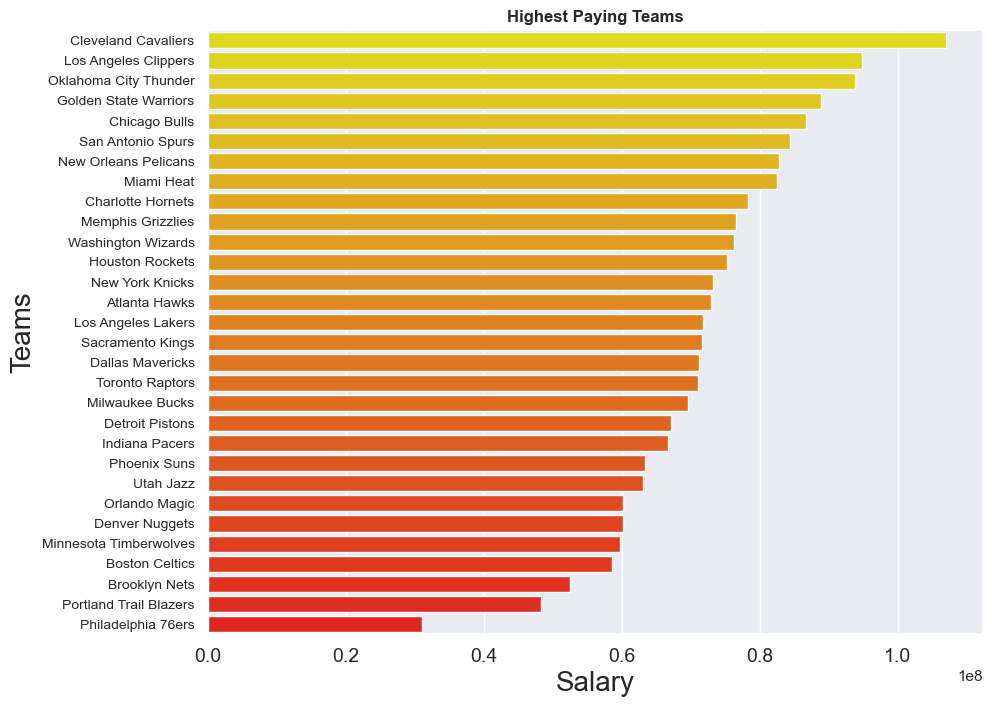

In [17]:
sns.set()
plt.figure(figsize=(10,8), dpi = 100)

sns.barplot(data=Highest_Paying_Team, x='Salary', y='Team', palette = 'autumn_r')
plt.yticks(size=10)
plt.xticks(size = 14)
plt.ylabel('Teams', size= 20)
plt.xlabel('Salary', size =20)
plt.title('Highest Paying Teams', size=12, fontdict={'fontweight':'bold'})


#### Let me find the 10 highest paid players, the teams they play, their position and other related information

In [18]:
# First let me find the first 10 highest paying amount.

highest_10 =data['Salary'].nlargest(10)
highest_10

109    25000000.0
169    22970500.0
33     22875000.0
251    22359364.0
339    22192730.0
100    21468695.0
414    20158622.0
164    20093064.0
349    20000000.0
23     19689000.0
Name: Salary, dtype: float64

In [19]:
highest=data[data['Salary']>=19689000.0].sort_values('Salary', ascending=False).reset_index(drop=True)
highest['Rank']=highest['Salary'].rank(ascending=False).astype(int)

In [20]:
highest=highest.set_index('Rank')

In [21]:
highest

# so though the Los Angeles Lakers is the 15th highest paying team, they pay the highest paid playing player in the name of Kobe Bryant.

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
Rank,,,,,,,,,
1,Kobe Bryant,Los Angeles Lakers,24.0,SF,37.0,6-6,212.0,NaN,25000000.0
2,LeBron James,Cleveland Cavaliers,23.0,SF,31.0,6-8,250.0,NaN,22970500.0
3,Carmelo Anthony,New York Knicks,7.0,SF,32.0,6-8,240.0,Syracuse,22875000.0
4,Dwight Howard,Houston Rockets,12.0,C,30.0,6-11,265.0,NaN,22359364.0
5,Chris Bosh,Miami Heat,1.0,PF,32.0,6-11,235.0,Georgia Tech,22192730.0
6,Chris Paul,Los Angeles Clippers,3.0,PG,31.0,6-0,175.0,Wake Forest,21468695.0
7,Kevin Durant,Oklahoma City Thunder,35.0,SF,27.0,6-9,240.0,Texas,20158622.0
8,Derrick Rose,Chicago Bulls,1.0,PG,27.0,6-3,190.0,Memphis,20093064.0
9,Dwyane Wade,Miami Heat,3.0,SG,34.0,6-4,220.0,Marquette,20000000.0


In [22]:
# Let me then find the 10 players with the least salary


data['Salary'].nsmallest(10).sort_values(ascending=False)

282    169883.0
45     167406.0
21     134215.0
92     111444.0
184    111444.0
175    111196.0
135     83397.0
130     55722.0
291     55722.0
32      30888.0
Name: Salary, dtype: float64

In [23]:
minimum=data[data['Salary']<=169883.0].sort_values('Salary')
minimum

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
32,Thanasis Antetokounmpo,New York Knicks,43.0,SF,23.0,6-7,205.0,NaN,30888.0
130,Phil Pressey,Phoenix Suns,25.0,PG,25.0,5-11,175.0,Missouri,55722.0
291,Orlando Johnson,New Orleans Pelicans,0.0,SG,27.0,6-5,220.0,UC Santa Barbara,55722.0
135,Alan Williams,Phoenix Suns,15.0,C,23.0,6-8,260.0,UC Santa Barbara,83397.0
175,Jordan McRae,Cleveland Cavaliers,12.0,SG,25.0,6-5,179.0,Tennessee,111196.0
92,Jeff Ayres,Los Angeles Clippers,19.0,PF,29.0,6-9,250.0,Arizona State,111444.0
184,Lorenzo Brown,Detroit Pistons,17.0,PG,25.0,6-5,189.0,North Carolina State,111444.0
21,Sean Kilpatrick,Brooklyn Nets,6.0,SG,26.0,6-4,219.0,Cincinnati,134215.0
45,Tony Wroten,New York Knicks,5.0,SG,23.0,6-6,205.0,Washington,167406.0
282,Bryce Dejean-Jones,New Orleans Pelicans,31.0,SG,23.0,6-6,203.0,Iowa State,169883.0


In [24]:
# Let me create a column namely Rank and set it as the index.

minimum['Rank']=minimum['Salary'].rank(ascending=True).astype(int)

In [25]:
minimum

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Rank
32,Thanasis Antetokounmpo,New York Knicks,43.0,SF,23.0,6-7,205.0,NaN,30888.0,1
130,Phil Pressey,Phoenix Suns,25.0,PG,25.0,5-11,175.0,Missouri,55722.0,2
291,Orlando Johnson,New Orleans Pelicans,0.0,SG,27.0,6-5,220.0,UC Santa Barbara,55722.0,2
135,Alan Williams,Phoenix Suns,15.0,C,23.0,6-8,260.0,UC Santa Barbara,83397.0,4
175,Jordan McRae,Cleveland Cavaliers,12.0,SG,25.0,6-5,179.0,Tennessee,111196.0,5
92,Jeff Ayres,Los Angeles Clippers,19.0,PF,29.0,6-9,250.0,Arizona State,111444.0,6
184,Lorenzo Brown,Detroit Pistons,17.0,PG,25.0,6-5,189.0,North Carolina State,111444.0,6
21,Sean Kilpatrick,Brooklyn Nets,6.0,SG,26.0,6-4,219.0,Cincinnati,134215.0,8
45,Tony Wroten,New York Knicks,5.0,SG,23.0,6-6,205.0,Washington,167406.0,9
282,Bryce Dejean-Jones,New Orleans Pelicans,31.0,SG,23.0,6-6,203.0,Iowa State,169883.0,10


In [26]:
# I have successfully created the Rank column, now let me set it as the index

minimum.set_index('Rank', inplace=True)


In [27]:
# Thus, these are the least paid players with their particulars
minimum

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
Rank,,,,,,,,,
1,Thanasis Antetokounmpo,New York Knicks,43.0,SF,23.0,6-7,205.0,NaN,30888.0
2,Phil Pressey,Phoenix Suns,25.0,PG,25.0,5-11,175.0,Missouri,55722.0
2,Orlando Johnson,New Orleans Pelicans,0.0,SG,27.0,6-5,220.0,UC Santa Barbara,55722.0
4,Alan Williams,Phoenix Suns,15.0,C,23.0,6-8,260.0,UC Santa Barbara,83397.0
5,Jordan McRae,Cleveland Cavaliers,12.0,SG,25.0,6-5,179.0,Tennessee,111196.0
6,Jeff Ayres,Los Angeles Clippers,19.0,PF,29.0,6-9,250.0,Arizona State,111444.0
6,Lorenzo Brown,Detroit Pistons,17.0,PG,25.0,6-5,189.0,North Carolina State,111444.0
8,Sean Kilpatrick,Brooklyn Nets,6.0,SG,26.0,6-4,219.0,Cincinnati,134215.0
9,Tony Wroten,New York Knicks,5.0,SG,23.0,6-6,205.0,Washington,167406.0


In [28]:
# Now let use the median to find out the average salary of the players, it is not appropriate to use the mean to find the salary since there is high chances of outliers existing.

median_salary=data.groupby('Position')['Salary'].median().sort_values(ascending= False).reset_index()
median_salary
# Thus, those who play as Center earns the most followed by Point Guard, then Power Foward and Shooting Guard with Small Fowards receiving the least

,Position,Salary
0,C,3811060.0
1,PG,3018463.5
2,PF,2943221.0
3,SG,2127840.0
4,SF,2020540.0


In [29]:
median_salary

,Position,Salary
0,C,3811060.0
1,PG,3018463.5
2,PF,2943221.0
3,SG,2127840.0
4,SF,2020540.0


### Presenting the median salary of the various position in a pie chat and bar graph...

Text(0.5, 1.0, 'median Salary of player positions')

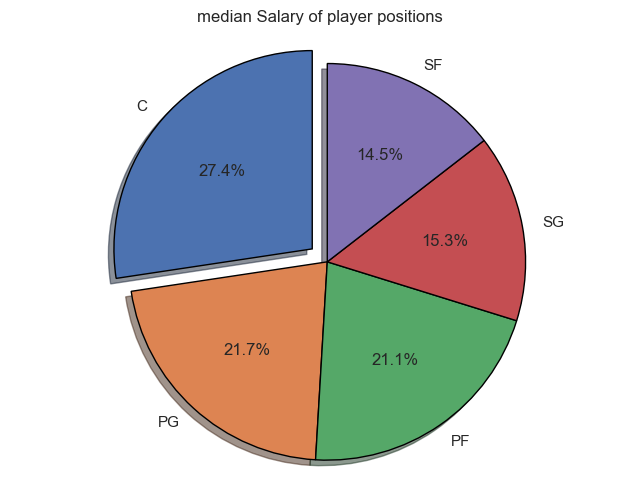

In [30]:
sns.set()
plt.figure(figsize=(8,6),dpi=100)
plt.pie(median_salary['Salary'], labels= median_salary['Position'], wedgeprops=({'edgecolor':'black'}),
       startangle=90,shadow =True, autopct= '%1.1f%%', explode =[0.1,0,0,0,0])


plt.axis('equal')
plt.title('median Salary of player positions')

Text(0.5, 1.0, 'Median Salary of Player Position')

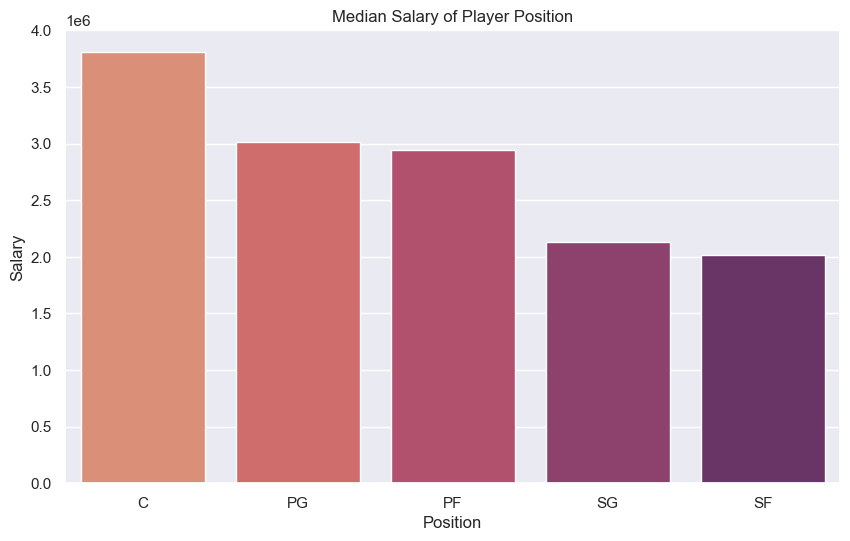

In [31]:
# Now let me represent the median Salary on a bar Graph

sns.set()
plt.figure(figsize=(10, 6), dpi=100)
sp=sns.barplot(data= median_salary, x='Position', y='Salary', palette="flare")

plt.title('Median Salary of Player Position', size=12)

# Thus the Center(C) position is the highest earning position whiles the Small Foward(SF) is the least earning 

# Data Cleaning

In [32]:
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [33]:
# Again let me find the information of the various fields of the data set whether they have missing values, the total number of
# ... rows and columns and the data type of each field

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 35.7+ KB


*NOTE:*
 With height, the first number before the delimiter(-) is measured in feet while the number after the delimeter is in inches.
 Thus, I will have to convert the feet to inches then sum the two inche figures to get total inches


In [34]:
#
to_inches = data['Height'].str.split('-').str.get(0).astype('float')*12

In [35]:
inches = data['Height'].str.split('-').str.get(1).astype('float')
inches

0       2.0
1       6.0
2       5.0
3       5.0
4      10.0
       ... 
452    10.0
453     3.0
454     1.0
455     3.0
456     0.0
Name: Height, Length: 457, dtype: float64

In [36]:
data['Height'] = to_inches + inches

In [37]:
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,74.0,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,78.0,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,77.0,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,77.0,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,82.0,231.0,NaN,5000000.0


In [38]:
# The column Name should be removed from the data set since the name of a player does not affect his salary

data = data.drop('Name', axis=1)
data.head()

,Team,Number,Position,Age,Height,Weight,College,Salary
0,Boston Celtics,0.0,PG,25.0,74.0,180.0,Texas,7730337.0
1,Boston Celtics,99.0,SF,25.0,78.0,235.0,Marquette,6796117.0
2,Boston Celtics,30.0,SG,27.0,77.0,205.0,Boston University,NaN
3,Boston Celtics,28.0,SG,22.0,77.0,185.0,Georgia State,1148640.0
4,Boston Celtics,8.0,PF,29.0,82.0,231.0,NaN,5000000.0


<AxesSubplot:xlabel='Number', ylabel='Salary'>

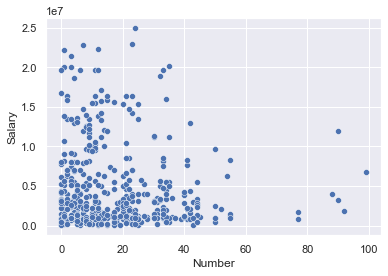

In [39]:
# The number on a player's jersey also doesn't determine his salary, this can be represented in the scatter plot below

sns.scatterplot(data= data, x='Number',y='Salary')

# clearly there is no linearity in the scatter plot below thus the jersey number of a player has no relationship with the salary of the player

In [40]:
# Thus will remove Number from the column

data = data.drop('Number',axis=1)

data.head()

,Team,Position,Age,Height,Weight,College,Salary
0,Boston Celtics,PG,25.0,74.0,180.0,Texas,7730337.0
1,Boston Celtics,SF,25.0,78.0,235.0,Marquette,6796117.0
2,Boston Celtics,SG,27.0,77.0,205.0,Boston University,NaN
3,Boston Celtics,SG,22.0,77.0,185.0,Georgia State,1148640.0
4,Boston Celtics,PF,29.0,82.0,231.0,NaN,5000000.0


In [41]:
# Let me find out the total number of rows and columns left

data.shape

# Thus, there are 457 rows and 7 columns in the data set

(457, 7)

### Dealing with missing values

In [42]:
# first let find the number of missing values in each column of the data set

data.isnull().sum()

# Thus only College and Salary has missing values

Team         0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [43]:
# Now before I decide what to do with the missing values let me find the percentage of the missing values

100*data.isnull().sum()/len(data)

Team         0.000000
Position     0.000000
Age          0.000000
Height       0.000000
Weight       0.000000
College     18.380744
Salary       2.407002
dtype: float64

In [44]:
# I will fill in the missing values of Salary column with zero... This will not have any significant effect on the data

data['Salary'] = data['Salary'].fillna(0)

In [45]:
# let me check if the change has been effected

100*data.isnull().sum()/len(data)

Team         0.000000
Position     0.000000
Age          0.000000
Height       0.000000
Weight       0.000000
College     18.380744
Salary       0.000000
dtype: float64

In [46]:
# it will be better  to replace the missing values of the college column with None than to remove the entire column since not all NBA players to a college


data['College'] = data['College'].fillna('None')

In [47]:
100*data.isnull().sum()/len(data)

Team        0.0
Position    0.0
Age         0.0
Height      0.0
Weight      0.0
College     0.0
Salary      0.0
dtype: float64

### Dealing with outliers

<AxesSubplot:>

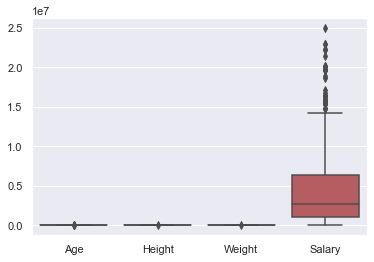

In [48]:
sns.boxplot(data= data)

<AxesSubplot:xlabel='Age'>

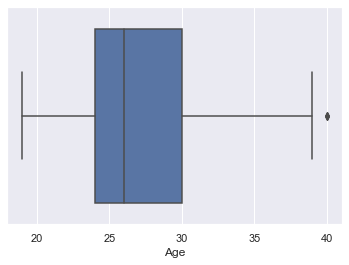

In [49]:
# let me find the it one by one for clearity

sns.boxplot(data=data, x='Age')

# The outlier here is above the upper limit, but for certainty sake will do the calculation to find it in the next cell

In [50]:
# finding the first and last quartile of the distribution above

q1,q3 = np.percentile(data['Age'],[25,75])

In [51]:
q1,q3

# The first quartile is 24 and the 3rd quartile is 30

(24.0, 30.0)

In [52]:
# finding the upper limit and thus find the outlier
# will first have to find the interquartile range (IQR)

iqr = q3 - q1
iqr

6.0

In [53]:
# finding the lower limit

lower_limit = q1-1.5*iqr
lower_limit

15.0

In [54]:
data[data['Age']<lower_limit]

# confirmed that there is no outlier below the lower limit

,Team,Position,Age,Height,Weight,College,Salary


In [55]:
# Now let work on the upper limit 

upper_limit = q3 + 1.5*iqr
upper_limit

39.0

In [56]:
outliers = data[data['Age']>upper_limit]
outliers

# if the the upper limit is 39years and 40 years is considered as an outlier, 
# ... and since all the three players considered outliers are 40 years, it would be advisable not to remove them since 40 is not far from the upper limit

,Team,Position,Age,Height,Weight,College,Salary
298,San Antonio Spurs,C,40.0,83.0,250.0,Wake Forest,5250000.0
304,San Antonio Spurs,PG,40.0,75.0,200.0,Utah,250750.0
400,Minnesota Timberwolves,PF,40.0,83.0,240.0,None,8500000.0


<AxesSubplot:xlabel='Age', ylabel='Salary'>

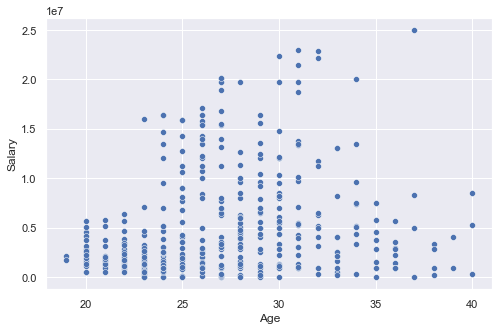

In [57]:
# from the data exploration we found that most of the highest paid players are older. let me now find more about it in a plot
plt.figure(figsize=(8,5))

sns.scatterplot(data=data, x='Age', y='Salary')



*comment:* From the above scatter plot, players who are between the ages of 27-32 earn the most(about $18m - $22m). The player who is 37 years and  earns about $25,000,000 is an outlier which when removed will be reasonable. It should be understood that nba players reach the peak of their performance from the age of 27years - 32 years, it's therefore not a surprising to find almost all the highest paid players are within the ages of 27 years to 32 years.

In [58]:
drp = data[(data['Age']==37) & (data['Salary']>=25000000)].index

In [59]:
# dropping the outlier

data = data.drop(drp, axis=0)

<AxesSubplot:xlabel='Age', ylabel='Salary'>

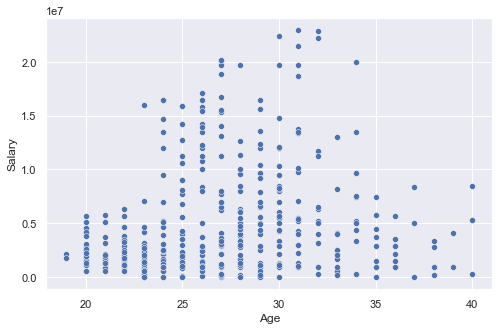

In [60]:
# Let me check if the outlier has been removed.

plt.figure(figsize=(8,5))
sns.scatterplot(data= data, x='Age', y='Salary')

# Outlier successfully removed

In [61]:
# Now since repeating the process above to find the outlier in each column will be time consuming, let me create a function that will give me the lower and upper limits


def limit(field):
    q1,q3 = np.percentile(field,[25,75])
    iqr = q3 - q1
    lower_limit = q1-1.5*iqr
    upper_limit = q3 + 1.5*iqr
    return[lower_limit, upper_limit]


<AxesSubplot:xlabel='Height'>

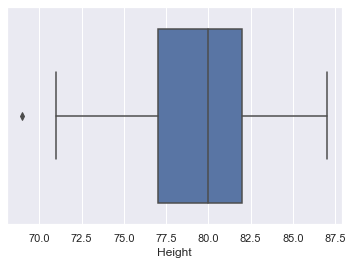

In [62]:
# Height
# let make a box plot of the Height distribution to find out if there exist an outlier

sns.boxplot(data=data, x='Height')

# Thus the outlier lies below the lower limit.

In [63]:
# Finding the lower limit and upper limit. I want to be very sure if the outlier indeed exist. First, I will find both limits(upper and lower), and continue to find if outlier exist also at the upper limit.

limit(data['Height'])

[69.5, 89.5]

Thus, the lower limit is 69.5 and the upper limit is 89.5

In [64]:
data[data['Height']<69.5]



,Team,Position,Age,Height,Weight,College,Salary
11,Boston Celtics,PG,27.0,69.0,185.0,Washington,6912869.0


The minimum height is 69 inches and the lower limit of the height is 69.5 inches. However, since height of 69 inches isn't too far below 69.5, I will keep this outlier as well.
Also, since the maximum height from the summary statistics is 87 inches which is lesser than the upper limit of 89.5, then truely there is no outlier above the upper limit. 

In [65]:
data.describe()

,Age,Height,Weight,Salary
count,456.000000,456.000000,456.000000,4.560000e+02
mean,26.916667,79.192982,221.543860,4.681660e+06
std,4.383494,3.435758,26.393519,5.137306e+06
min,19.000000,69.000000,161.000000,0.000000e+00
25%,24.000000,77.000000,200.000000,1.000000e+06
50%,26.000000,80.000000,220.000000,2.647980e+06
75%,30.000000,82.000000,240.000000,6.307851e+06
max,40.000000,87.000000,307.000000,2.297050e+07


*Notice:* From the summary statistics above, the minimum salary is zero. This is an anomaly because no professional NBA players plays without receiving salary. On this note, all players who receive zero salaries are to be removed from the dataset.

<AxesSubplot:xlabel='Weight'>

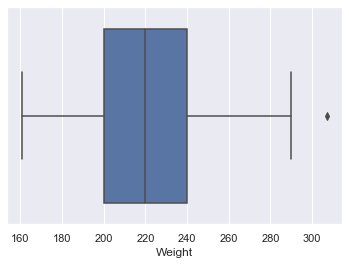

In [66]:
# let the distribution of the Weight data set

sns.boxplot(x='Weight',data=data)

In [67]:
# let me find the out the upper limit and find out the outlier at the upper limit

limit(data['Weight'])

# thus the 307 of weight is the outlier. let me find out the number of players who weight was 307

[140.0, 300.0]

In [68]:
drp=data[data['Weight']==307].index

In [69]:
data = data.drop(drp,axis=0)

<AxesSubplot:xlabel='Weight'>

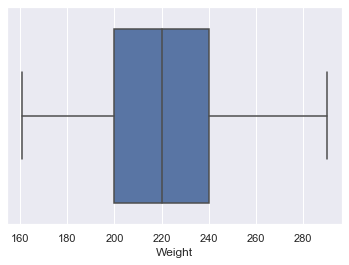

In [70]:
# checking if change has taken place

sns.boxplot(x='Weight', data=data)

# outlier is successfully removed

<AxesSubplot:xlabel='Salary'>

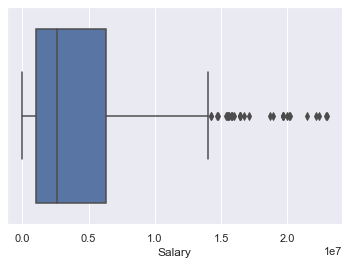

In [71]:
# Finally let me check the distribution of the Salary field

sns.boxplot(data=data, x='Salary')

# There are many outliers above the upper limit.Though there a number of outliers it will be useful to keep them
# However since no professional NBA player plays for free, it will be reasonable to remove players with zero Salary

In [72]:
no_salary = data[data['Salary']==0].index

In [73]:
data = data.drop(no_salary,axis=0)

In [74]:
data[data['Salary']==0]

,Team,Position,Age,Height,Weight,College,Salary


In [75]:
# finding the information of those whose salary exceeds the upper limit of $ 14,212,500.00

data[data['Salary']>14212500].sort_values('Salary').reset_index()

,index,Team,Position,Age,Height,Weight,College,Salary
0,82,Golden State Warriors,PF,26.0,79.0,230.0,Michigan State,14260870.0
1,179,Cleveland Cavaliers,C,25.0,81.0,238.0,Texas,14260870.0
2,219,Milwaukee Bucks,SG,24.0,80.0,234.0,Texas A&M,14700000.0
3,341,Miami Heat,PG,30.0,75.0,190.0,None,14783000.0
4,238,Dallas Mavericks,SF,27.0,82.0,230.0,Florida,15361500.0
5,448,Utah Jazz,SF,26.0,80.0,226.0,Butler,15409570.0
6,89,Golden State Warriors,SG,26.0,79.0,215.0,Washington State,15501000.0
7,288,New Orleans Pelicans,SG,27.0,76.0,215.0,Indiana,15514031.0
8,111,Los Angeles Lakers,C,29.0,86.0,270.0,Georgetown,15592217.0
9,249,Houston Rockets,SG,26.0,77.0,220.0,Arizona State,15756438.0


### Dealing with Dummy Variables

In [76]:
# Let me call the dataset again.
data.head()

,Team,Position,Age,Height,Weight,College,Salary
0,Boston Celtics,PG,25.0,74.0,180.0,Texas,7730337.0
1,Boston Celtics,SF,25.0,78.0,235.0,Marquette,6796117.0
3,Boston Celtics,SG,22.0,77.0,185.0,Georgia State,1148640.0
4,Boston Celtics,PF,29.0,82.0,231.0,None,5000000.0
5,Boston Celtics,PF,29.0,81.0,240.0,None,12000000.0


In [77]:
# Get the string variables to work the dummy on.

string_variables = data.select_dtypes(include='object')

string_variables.head()

,Team,Position,College
0,Boston Celtics,PG,Texas
1,Boston Celtics,SF,Marquette
3,Boston Celtics,SG,Georgia State
4,Boston Celtics,PF,None
5,Boston Celtics,PF,None


In [78]:
# applying the dummy technique

dummies = pd.get_dummies(string_variables, drop_first=True)
dummies.head(3)

,Team_Boston Celtics,Team_Brooklyn Nets,Team_Charlotte Hornets,Team_Chicago Bulls,Team_Cleveland Cavaliers,Team_Dallas Mavericks,Team_Denver Nuggets,Team_Detroit Pistons,Team_Golden State Warriors,Team_Houston Rockets,...,College_Washington State,College_Weber State,College_Westchester CC,College_Western Carolina,College_Western Kentucky,College_Western Michigan,College_Wichita State,College_Wisconsin,College_Wyoming,College_Xavier
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# Now let me get the numerical data types as well

numeric_variables = data.select_dtypes(exclude='object')
numeric_variables.head(3)

,Age,Height,Weight,Salary
0,25.0,74.0,180.0,7730337.0
1,25.0,78.0,235.0,6796117.0
3,22.0,77.0,185.0,1148640.0


In [80]:
data =pd.concat([numeric_variables, dummies],axis=1)
data

,Age,Height,Weight,Salary,Team_Boston Celtics,Team_Brooklyn Nets,Team_Charlotte Hornets,Team_Chicago Bulls,Team_Cleveland Cavaliers,Team_Dallas Mavericks,...,College_Washington State,College_Weber State,College_Westchester CC,College_Western Carolina,College_Western Kentucky,College_Western Michigan,College_Wichita State,College_Wisconsin,College_Wyoming,College_Xavier
0,25.0,74.0,180.0,7730337.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25.0,78.0,235.0,6796117.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22.0,77.0,185.0,1148640.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29.0,82.0,231.0,5000000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,29.0,81.0,240.0,12000000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,20.0,82.0,234.0,2239800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
453,26.0,75.0,203.0,2433333.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
454,24.0,73.0,179.0,900000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
455,26.0,87.0,256.0,2900000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Now let move to model development

In [81]:
# FINDING THE TOTAL NUMBER OF SAMPLE MSIZE (ROWS)

len(data)

444

In [82]:
# Defining the features

X = data.drop('Salary',axis=1)

In [83]:
# Defining the target

Y = data['Salary']

In [84]:
# import the class to Split the data into train and test set

from sklearn.model_selection import train_test_split

In [85]:
# Splitting the data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state =42)

### Using Random Forest

In [86]:
# IMPORTING THE RANDOM FOREST REGRESSOR FOR THE FOR RANDOM FOREST MODEL DEVELOPMENT

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state = 42)

rf_model.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [87]:
# IMPORTING THE CLASSES FOR PERFORMANCE METRICS

from sklearn.metrics import mean_absolute_error, mean_squared_error


In [88]:
# WRITING A SIMPLE FOR EVALUTING THE PERFORMANCE OF THE MODEL

def evaluation(model):
    pred = model.predict(X_test)
    MAE = mean_absolute_error(Y_test,pred)
    RMSE = np.sqrt(mean_squared_error(Y_test,pred))
    print(f"The mean absolute value for the Random Forest model is: ${MAE.round(2)}")
    print(f"The root mean squared of the model is: ${RMSE.round(2)}")

In [89]:
evaluation(rf_model)

The mean absolute value for the Random Forest model is: $4061611.91
The root mean squared of the model is: $5650560.0


<AxesSubplot:xlabel='Age', ylabel='Salary'>

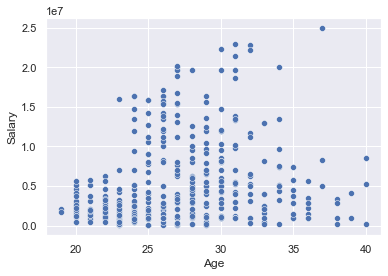

In [94]:
sns.scatterplot(data= df, x='Age', y='Salary')

<AxesSubplot:xlabel='Weight', ylabel='Salary'>

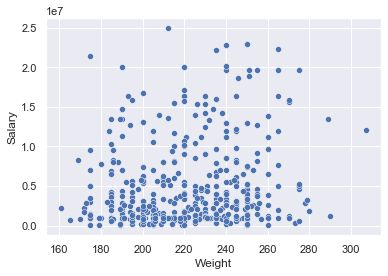

In [95]:
sns.scatterplot(data=df, x='Weight', y='Salary')

### Using Gradient Boosting Ensembling

In [96]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state = 42)

gb.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=42)

In [97]:
#g_pred = gb.predict(X_test)

In [98]:
evaluation(gb)

The mean absolute value for the Random Forest model is: $4121020.93
The root mean squared of the model is: $5591263.56


### Using Adaptive Boosting ensembling

In [99]:
from sklearn.ensemble import AdaBoostRegressor

ada_model = AdaBoostRegressor(random_state=42)

ada_model.fit(X_train,Y_train)

AdaBoostRegressor(random_state=42)

In [100]:
evaluation(ada_model)

The mean absolute value for the Random Forest model is: $4355348.36
The root mean squared of the model is: $5438566.34


### Using Decision Tree

In [101]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [102]:
evaluation(dt_model)

The mean absolute value for the Random Forest model is: $4650517.02
The root mean squared of the model is: $6745468.0


### COMMENTS ON THE CHOSEN MODEL

From  the Tree Based algorithmns worked on, the Adaptive Boosting algorithmn has a better RMSE. For this reason, I will use the Random Forest and tune the hyperparameters to get the optimal model.

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
param = {"n_estimators": [20, 25,35, 40, 50, 60, 65]
        }

In [105]:
grid = GridSearchCV(ada_model,param_grid=param)

In [106]:
grid.fit(X_train,Y_train)

GridSearchCV(estimator=AdaBoostRegressor(random_state=42),
             param_grid={'n_estimators': [20, 25, 35, 40, 50, 60, 65]})

In [107]:
grid.best_params_

{'n_estimators': 20}

In [108]:
evaluation(grid)

The mean absolute value for the Random Forest model is: $4355348.36
The root mean squared of the model is: $5438566.34


In [109]:

grid.score(X_test,Y_test)

0.01624992601964914

After several tuning, the RMSE is $ 5,438,566.34 same us the simple AdaboostingRegressor so will use the base AdaboostingRegressor. I will explore the Support Vector Machine later to find out its performance as well... However, I don't expect the SVM kernel to be linear, it will either be polynomial or sigmoid or raial base function (rbf) since the data isn't suitable for linear regression.
Let me continue with finding the important features, and do a additional data exploration with the data.

### Finding out important features

In [110]:
importance = pd.DataFrame(data = ada_model.feature_importances_, index = X.columns, columns = ['Feat Importance'])
importance = importance.sort_values('Feat Importance', ascending=True)

In [111]:
#  LET ME REMOVE ALL FEATURES THAT HAVE ZERO IMPORTANCE



In [112]:
importance = importance[importance['Feat Importance']>0]
importance

,Feat Importance
Position_PG,0.000129
Team_Chicago Bulls,0.000818
College_Duke,0.006500
College_Kentucky,0.015227
Team_Golden State Warriors,0.015718
College_Texas A&M,0.019258
Position_SG,0.025030
Team_Los Angeles Clippers,0.026151
College_Memphis,0.026903
Team_New York Knicks,0.029029


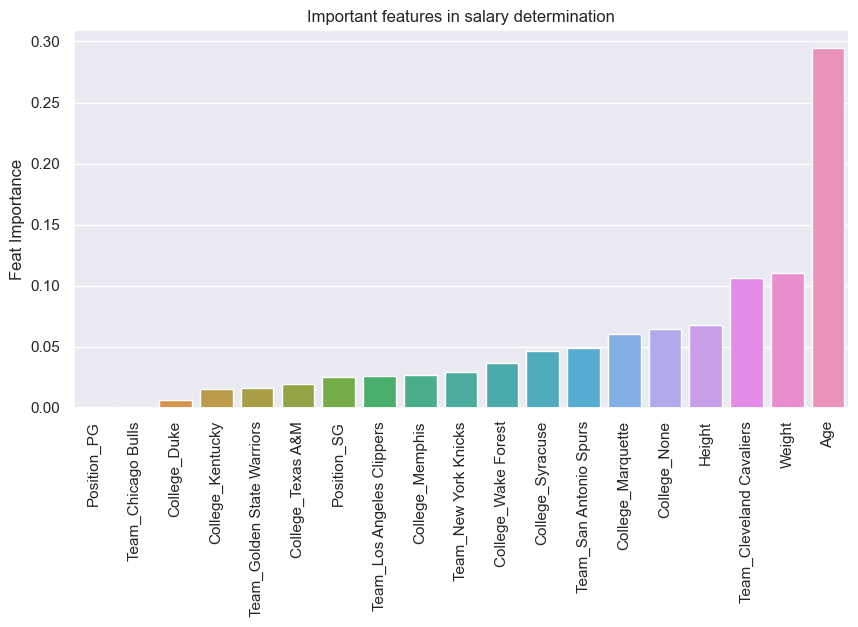

In [113]:
# LET ME DISPLAY THE IMPORTANT FEATURES IN A BAR GRAPH

plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=importance, x=importance.index, y='Feat Importance') 
plt.title('Important features in salary determination')
plt.xticks(rotation=90);

### *Comment on the feature importance:*
1. It shown from the graph that Age is the most important feature in the determination of an nba player's salary, followed by weight, Cleveland Cavaliers, Height down to Pointing Guard position.
2. Cleveland Cavaliers is an important feature in the team that determines the salary of nba players, and None in the college category follows.
3. In considering age, we found out from the exploratory data analysis that players who are between the ages of 27 years to 32 years receive the highest salary. The reason is because, players reach the peak of their performance within these ages thus, the high salary paid to them.

In [118]:
# MODEL DEPLOYMENT

ada_model.fit(X,Y)

AdaBoostRegressor(random_state=42)

In [121]:
from joblib import dump

In [122]:
dump(ada_model, 'nba_salary.joblib')

['nba_salary.joblib']